<a href="https://colab.research.google.com/github/88FaHaD/Deep-learning/blob/main/CNN_Binary_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision
computer vision is a practice  of writing algorithem which can discover patterns in visual data.Such as the cameras of self driving car


In [ ]:
import tensorflow as tf

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-17 20:58:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   192MB/s    in 0.5s    

2025-01-17 20:58:10 (192 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



# EDA EXPLORATIVE DATA ANALYSIS

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

# Visualization

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


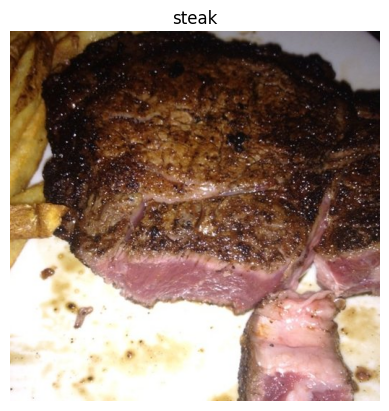

In [ ]:
img=view_random_image(target_dir="pizza_steak/train/", target_class="steak")


Image shape: (512, 512, 3)


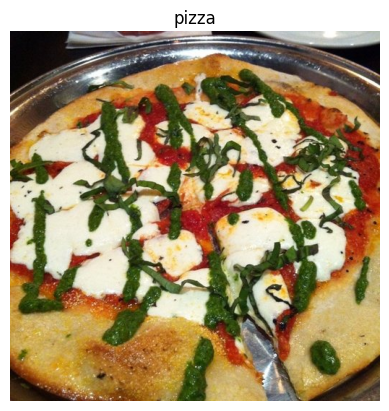

In [ ]:
img2=view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

array([[[ 85,  50,  10],
        [ 86,  51,  11],
        [ 90,  55,  13],
        ...,
        [  9,   8,  13],
        [  7,   8,  12],
        [  5,   6,  10]],

       [[ 88,  53,  13],
        [ 89,  54,  12],
        [ 93,  58,  16],
        ...,
        [ 10,   9,  14],
        [  9,  10,  14],
        [  8,   9,  13]],

       [[ 92,  57,  15],
        [ 93,  58,  16],
        [ 98,  63,  21],
        ...,
        [ 11,  11,  13],
        [ 11,  11,  13],
        [ 10,  10,  12]],

       ...,

       [[254, 252, 255],
        [254, 252, 255],
        [254, 252, 255],
        ...,
        [240, 230, 218],
        [239, 229, 217],
        [237, 227, 215]],

       [[255, 251, 255],
        [255, 251, 255],
        [254, 252, 255],
        ...,
        [240, 230, 220],
        [238, 230, 219],
        [238, 230, 219]],

       [[255, 250, 254],
        [255, 250, 254],
        [254, 252, 255],
        ...,
        [239, 229, 219],
        [238, 230, 219],
        [238, 230, 219]]], dtype=uint8)
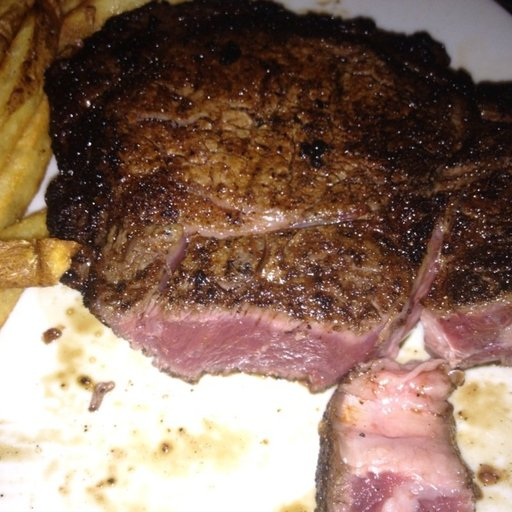

In [ ]:
img

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 85,  50,  10],
        [ 86,  51,  11],
        [ 90,  55,  13],
        ...,
        [  9,   8,  13],
        [  7,   8,  12],
        [  5,   6,  10]],

       [[ 88,  53,  13],
        [ 89,  54,  12],
        [ 93,  58,  16],
        ...,
        [ 10,   9,  14],
        [  9,  10,  14],
        [  8,   9,  13]],

       [[ 92,  57,  15],
        [ 93,  58,  16],
        [ 98,  63,  21],
        ...,
        [ 11,  11,  13],
        [ 11,  11,  13],
        [ 10,  10,  12]],

       ...,

       [[254, 252, 255],
        [254, 252, 255],
        [254, 252, 255],
        ...,
        [240, 230, 218],
        [239, 229, 217],
        [237, 227, 215]],

       [[255, 251, 255],
        [255, 251, 255],
        [254, 252, 255],
        ...,
        [240, 230, 220],
        [238, 230, 219],
        [238, 230, 219]],

       [[255, 250, 254],
        [255, 250, 254],
        [254, 252, 255],
        ...,
        [239, 229, 21

In [ ]:
img.shape,img2.shape

((512, 512, 3), (512, 512, 3))

# Data preprocessing
1. Turn all data into numbers
2. Make sure all tensors are in right shape
3. Scale features ie normalize or stanaruize neural networks prefer Normalization

In [ ]:
img/255

array([[[0.33333333, 0.19607843, 0.03921569],
        [0.3372549 , 0.2       , 0.04313725],
        [0.35294118, 0.21568627, 0.05098039],
        ...,
        [0.03529412, 0.03137255, 0.05098039],
        [0.02745098, 0.03137255, 0.04705882],
        [0.01960784, 0.02352941, 0.03921569]],

       [[0.34509804, 0.20784314, 0.05098039],
        [0.34901961, 0.21176471, 0.04705882],
        [0.36470588, 0.22745098, 0.0627451 ],
        ...,
        [0.03921569, 0.03529412, 0.05490196],
        [0.03529412, 0.03921569, 0.05490196],
        [0.03137255, 0.03529412, 0.05098039]],

       [[0.36078431, 0.22352941, 0.05882353],
        [0.36470588, 0.22745098, 0.0627451 ],
        [0.38431373, 0.24705882, 0.08235294],
        ...,
        [0.04313725, 0.04313725, 0.05098039],
        [0.04313725, 0.04313725, 0.05098039],
        [0.03921569, 0.03921569, 0.04705882]],

       ...,

       [[0.99607843, 0.98823529, 1.        ],
        [0.99607843, 0.98823529, 1.        ],
        [0.99607843, 0

# END TO END CNN ALSO VGG
1. Load our images.
2. Preprocess our images
3. Build a CNN
4. Compile our CNN
5. Fit the CNN

# Preproceesing our data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)
# prepocessing the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
valid_datagen=ImageDataGenerator(rescale=1/255.)

# setup paths to our data directories
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"
# import data from directories and turn into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory("pizza_steak/test/",batch_size=32,target_size=(224,224),class_mode="binary",seed=42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
img.shape

(512, 512, 3)

# Creating the CNN
The reason we pass len(train_Data) and len(validation_steps) is we want the data to be fit on batchs of image of 32 rather then whole image as we cant compute at that scale

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)





/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Why do we use steps_per_epoch and validation_steps?
When training a machine learning model, the dataset might be too large to fit into the computer's memory at once. To solve this, we split the data into smaller batches. Each batch contains a fixed number of images (e.g., 32 images). The model processes one batch at a time.

**steps_per_epoch**

This tells the model how many batches to process in one complete pass (or epoch) over the training data.

**Why is it needed?**

We need to process the data in smaller chunks (batches), and steps_per_epoch ensures the model knows how many of these chunks (batches) to process before finishing one epoch.
How is it calculated?: It's calculated by dividing the total number of images in the training set by the batch size. For example, if there are 3200 images and the batch size is 32, then the model will need to process 100 batches in each epoch (3200 / 32 = 100).
validation_steps: This is similar to steps_per_epoch, but for the validation dataset. It ensures the model processes the validation data in smaller batches.

**Why is it needed?**

 Just like for training, we want to process the validation data in manageable batches to avoid running out of memory.

** In summary**

We use steps_per_epoch and validation_steps to break the data into smaller, manageable batches. This is important because processing all the images at once would require too much memory, and the computer wouldn't be able to handle it. By using batches, the model can learn from the data without overwhelming the system.

In [ ]:
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.6192 - loss: 0.6444 - val_accuracy: 0.7780 - val_loss: 0.4750
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.7823 - loss: 0.4887 - val_accuracy: 0.7700 - val_loss: 0.4736
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.7990 - loss: 0.4487 - val_accuracy: 0.8560 - val_loss: 0.3717


# Model Performance Evaluation - Notes

 1. Good Validation Accuracy:
 - Validation Accuracy: 84.6% (Above 80% is good for binary classification ike 'pizza vs. steak')
 2. Reasonable Loss:
 - Validation Loss: 0.3682 (Low loss suggests good predictions; below 0.5 is onsidered good)
 3. Training and Validation Accuracy Consistency:
 - Training Accuracy: 81.9%
 - Validation Accuracy: 84.6%
 - The accuracies are close, indicating no overfitting and good generalization.
 4. Validation Loss is Lower than Training Loss:
 - Training Loss: 0.4277
 - Validation Loss: 0.3682
 - Validation loss lower than training loss indicates the model is generalizing well on unssen data.
 5. Improvement Potential:
 - Model performance is good, but improvements are possible:
   - Fine-tuning the model (e.g., architectures, hyperparameters).
   - Exploring data augmentation or transfer learning for better performance.


In [ ]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# lets use simple neural network model to fit on our data

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])
history=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.5530 - loss: 98.1553 - val_accuracy: 0.7400 - val_loss: 1.9211
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.6494 - loss: 5.3339 - val_accuracy: 0.5040 - val_loss: 1.5019
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.7080 - loss: 1.4063 - val_accuracy: 0.7820 - val_loss: 0.4891


### 1 visualize the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


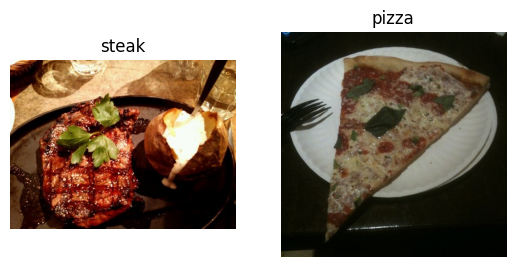

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")
plt.subplot(1,2,2)
pizza_img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

### 2. preprocees the data

In [ ]:
# define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"



### Batch
small subset of data

### Image data generator
ImageDataGenerator loads and processes images, making them ready for training by resizing, scaling, or applying changes like flipping or rotating.

In [ ]:
# train and test data generators
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# flowfromdirectory

flow_from_directory loads images directly from a directory, organizes them into batches, and labels them based on folder names. It also preprocesses the images (e.g., rescaling, resizing,color) for training or validation.

directory name,batch size , data type you are working with ie binary,categorical,color mode gray or rgb

In [ ]:
# loading our images from directories and turn them into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary")
test_data=test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of train data
images, labels=next(train_data)
len(images),len(labels)

(32, 32)

In [ ]:
#how many abtches are there
len(train_data)

47

In [ ]:
images[:2],images[0].shape

(array([[[[0.16078432, 0.06666667, 0.02745098],
          [0.16470589, 0.07058824, 0.03137255],
          [0.16470589, 0.07058824, 0.03137255],
          ...,
          [0.28235295, 0.11764707, 0.01960784],
          [0.29803923, 0.1254902 , 0.01176471],
          [0.29803923, 0.1254902 , 0.01176471]],
 
         [[0.16470589, 0.07843138, 0.02745098],
          [0.16862746, 0.07450981, 0.02745098],
          [0.16470589, 0.07058824, 0.02352941],
          ...,
          [0.30980393, 0.13725491, 0.02352941],
          [0.31764707, 0.14901961, 0.02352941],
          [0.30588236, 0.13725491, 0.01176471]],
 
         [[0.16078432, 0.07450981, 0.02352941],
          [0.16078432, 0.07450981, 0.02352941],
          [0.16078432, 0.07450981, 0.02352941],
          ...,
          [0.28627452, 0.13333334, 0.01960784],
          [0.2901961 , 0.13725491, 0.02352941],
          [0.28627452, 0.13333334, 0.01960784]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [ ]:
labels

array([1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

### 3 Creating our CNN model Baseline
A baseline is a relatively simple model or existing result that you setup at the begining which uyou try to beat while experimenting with different models

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation # Changed Maxpooling2D to MaxPooling2D
from tensorflow.keras import Sequential

In [ ]:
simpleCNN = Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), activation="relu", strides=1, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),  # Corrected "activaion" to "activation"
    Flatten(),
    Dense(1, activation="sigmoid")
])

simpleCNN.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["accuracy"])  # Corrected "Accuracy" to "accuracy"



In [ ]:
simpleCNN.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 116640)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │         116,641 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,741 (463.83 KB)

 Trainable params: 118,741 (463.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history4cnn= simpleCNN.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.4864 - loss: 2.7136 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.5004 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5071 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_1.evaluate(test_data),simpleCNN.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8802 - loss: 0.3492
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.4980 - loss: 0.6932


([0.3716917634010315, 0.8560000061988831], [0.6931485533714294, 0.5])

# Ploting loss curves

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

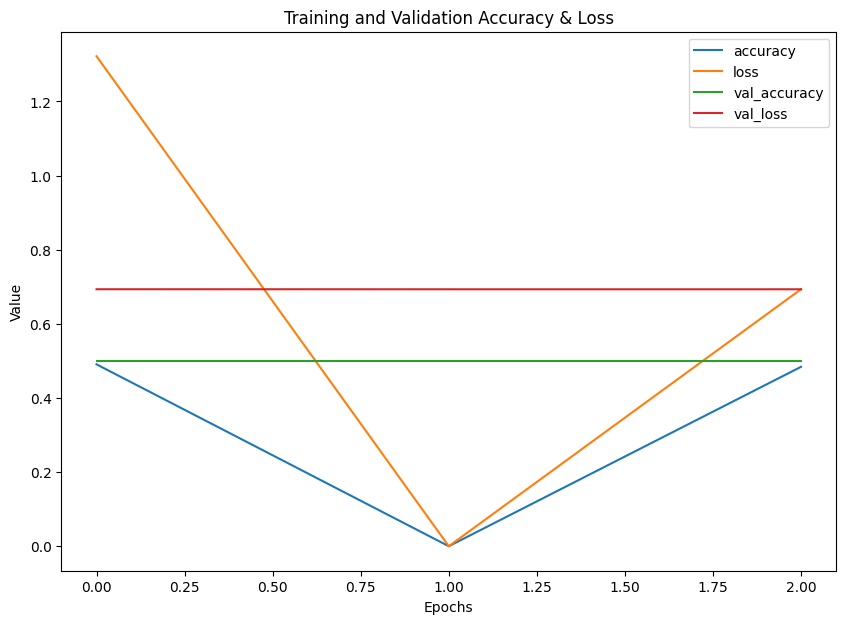

In [ ]:
history_data = history4cnn.history

# Ensure all arrays are the same length by trimming excess elements
min_length = min(len(v) for v in history_data.values())
for key in history_data:
    history_data[key] = history_data[key][:min_length]

# Create a DataFrame and plot it
history_df = pd.DataFrame(history_data)
history_df.plot(figsize=(10, 7))

# Add titles and labels to the plot
plt.title("Training and Validation Accuracy & Loss")
plt.ylabel("Value")
plt.xlabel("Epochs")
plt.show()


In [ ]:
def plot_metrics(history):
    # Extract metrics from the history object
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# **NOTE**
**When  models validation loss starts to increase it is likely that model is overfiting**

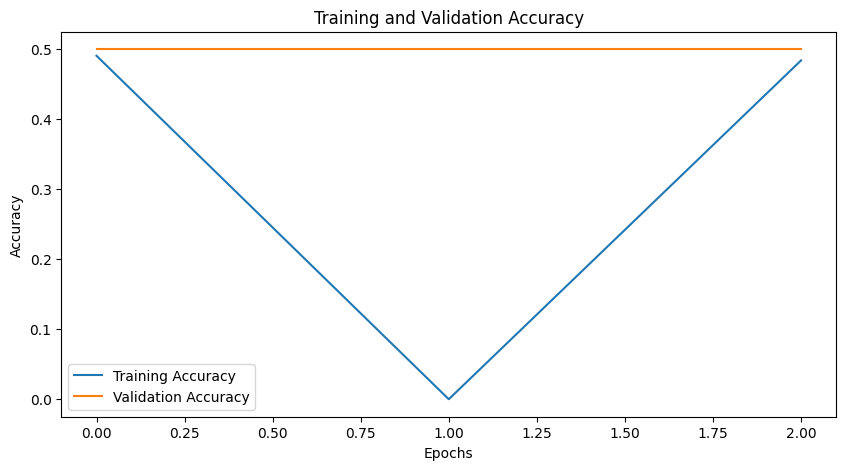

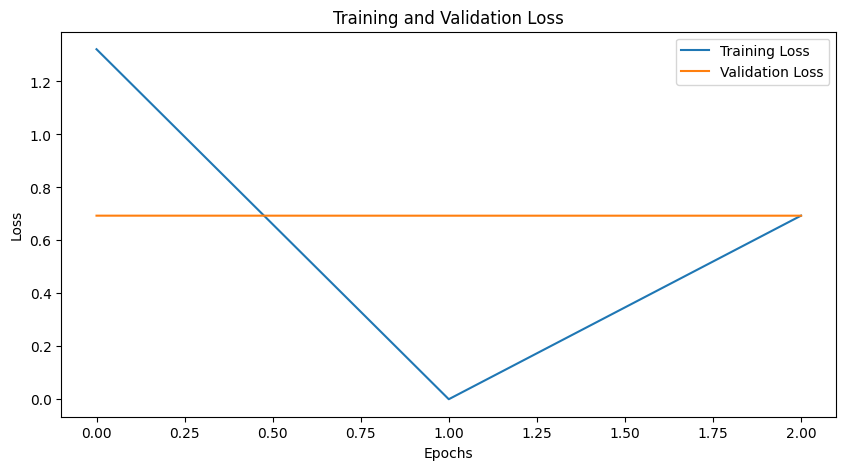

In [ ]:
plot_metrics(history4cnn)

### Reduce overfiting also known as Regularization
* add data augmentation
* add regularizationlayers such as maxpol2d
* add more data

In [ ]:
model_advanced=Sequential([
    Conv2D(filters=10,kernel_size=3,input_shape=(224,224,3),activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_advanced.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

history_advanced=model_advanced.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))




Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.5787 - loss: 0.6725 - val_accuracy: 0.7120 - val_loss: 0.5273
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7587 - loss: 0.5019 - val_accuracy: 0.8520 - val_loss: 0.4203
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.7832 - loss: 0.4550 - val_accuracy: 0.8440 - val_loss: 0.3954


In [ ]:
model_advanced.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

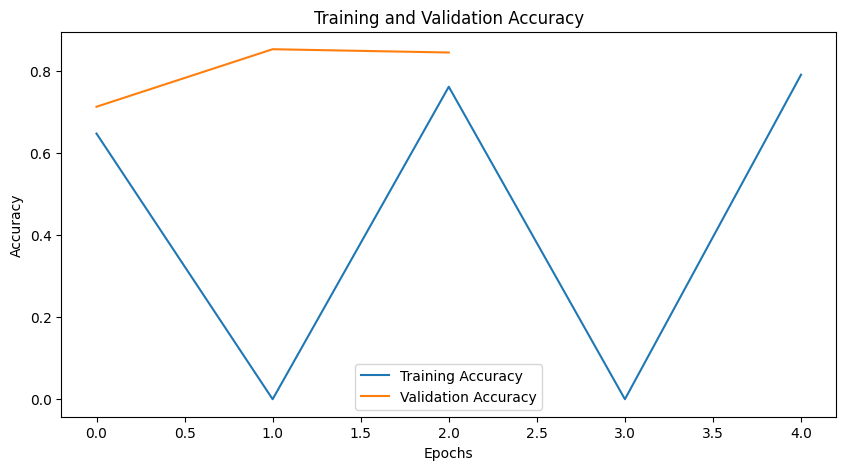

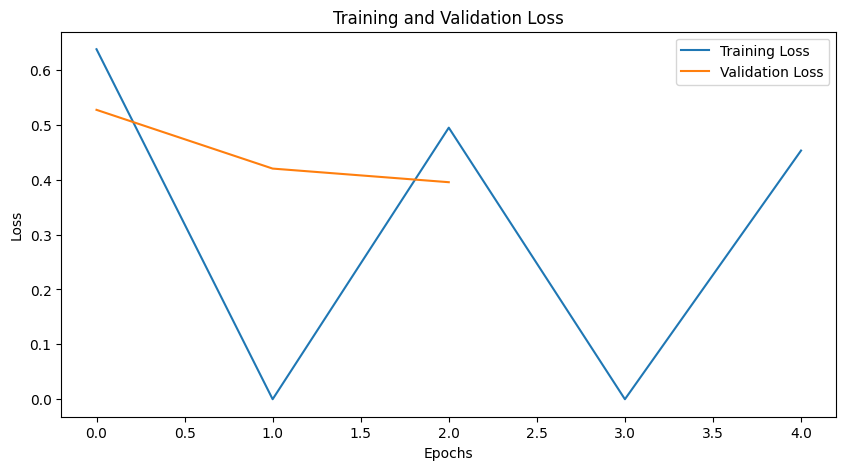

In [ ]:
plot_metrics(history_advanced)

### Data Augmentation

* only done on training data

"Data augmentation is a technique used to artificially expand the size and diversity of a dataset by applying transformations to the existing data. These transformations, such as rotations, flips, zooms, shifts, and color adjustments, create variations of the images, allowing the model to learn from a more diverse set of examples. This helps improve the model's ability to generalize to new, unseen data and reduces the risk of overfitting."



In [ ]:
# data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

# using image data generator without data augmentation for traindataset
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create imagedatagenerator without data augmentation for testdataset
test_datagen=ImageDataGenerator(rescale=1/255.)


# Visualize data augmentation

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", shuffle=True)
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", shuffle=False)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)  # labels are not augmented



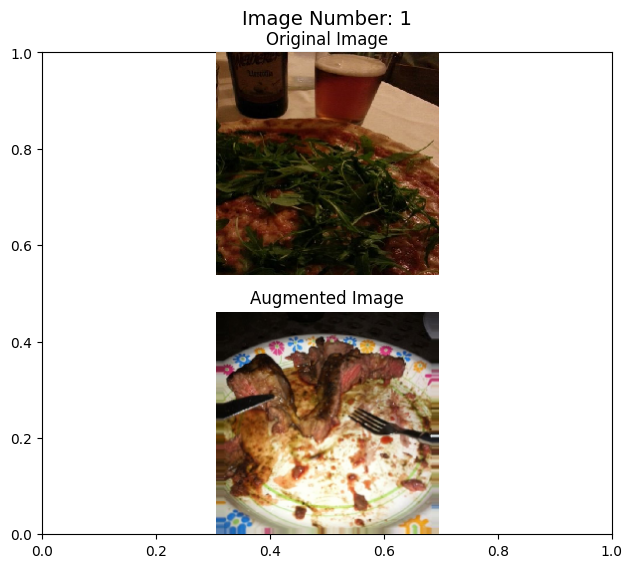

In [ ]:
random_idx = np.random.randint(0, 32)  # Assuming the batch size is 32

# Plot the image number at the top, followed by original and augmented images
plt.figure(figsize=(6, 6))

# Image number
plt.text(0.5, 1.05, f"Image Number: {random_idx}", ha='center', va='bottom', fontsize=14)

# Original image
plt.subplot(2, 1, 1)
plt.imshow(images[random_idx])
plt.title("Original Image")
plt.axis('off')

# Augmented image
plt.subplot(2, 1, 2)
plt.imshow(augmented_images[random_idx])
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

#Augmented model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
model_augmented_data = Sequential([
    Input(shape=(224, 224, 3)),  # Input layer for specifying input shape
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])
# Compile the model
model_augmented_data.compile(loss="binary_crossentropy",
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["accuracy"])

# Train the model using augmented data
history_augmented_data = model_augmented_data.fit(train_data_augmented,
                                                  epochs=5,
                                                  steps_per_epoch=len(train_data_augmented),
                                                  validation_data=test_data,
                                                  validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 423ms/step - accuracy: 0.5839 - loss: 0.6728 - val_accuracy: 0.7800 - val_loss: 0.5085
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 409ms/step - accuracy: 0.6966 - loss: 0.5698 - val_accuracy: 0.7660 - val_loss: 0.4800
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 419ms/step - accuracy: 0.7585 - loss: 0.5259 - val_accuracy: 0.8220 - val_loss: 0.4139


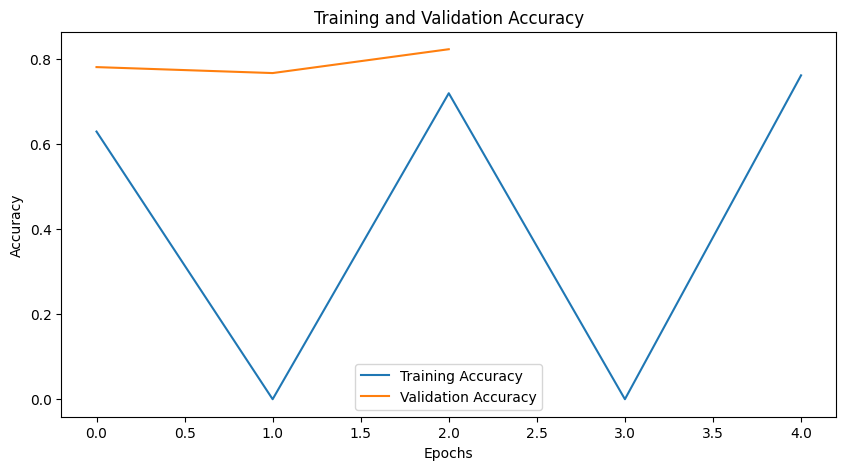

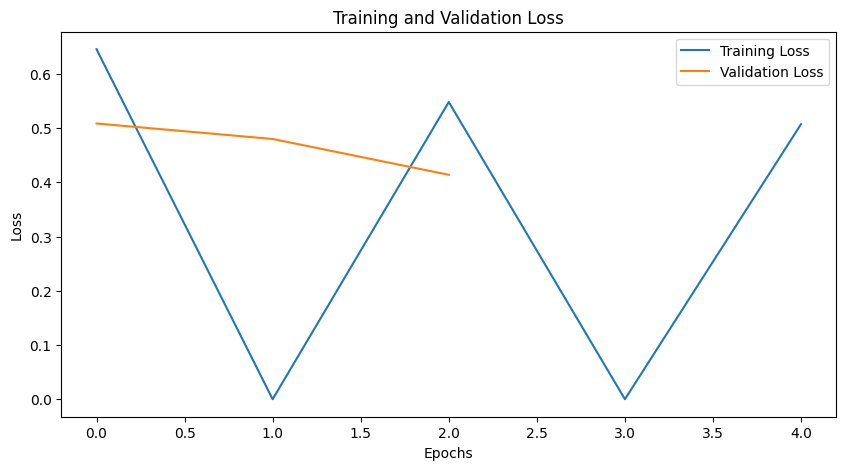

In [ ]:
plot_metrics(history_augmented_data)

# Schufle our augmented tranng data

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", shuffle=True)



Found 1500 images belonging to 2 classes.


In [ ]:
model_augmented_data2 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_augmented_data2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower the learning rate
    metrics=["accuracy"]
)




In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    if epoch > 3:
        return lr * 0.5  # Decrease learning rate by half every 3 epochs
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)

history_augmented_data2 = model_augmented_data2.fit(
    train_data_augmented,
    epochs=10,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[lr_callback]
)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 418ms/step - accuracy: 0.7736 - loss: 0.4874 - val_accuracy: 0.8420 - val_loss: 0.3830 - learning_rate: 1.0000e-04
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - accuracy: 0.7830 - loss: 0.4796 - val_accuracy: 0.8440 - val_loss: 0.3917 - learning_rate: 1.0000e-04
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 415ms/step - accuracy: 0.7882 - loss: 0.4655 - val_accuracy: 0.8460 - val_loss: 0.3831 - learning_rate: 5.0000e-05
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 2.5000e-05
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 428ms/step - accuracy: 0.7897 - loss: 0.4486 - val_accuracy: 0.8420 - val_loss: 0.3796 - learning_rate: 1.2500e-05
Epoch 8/10

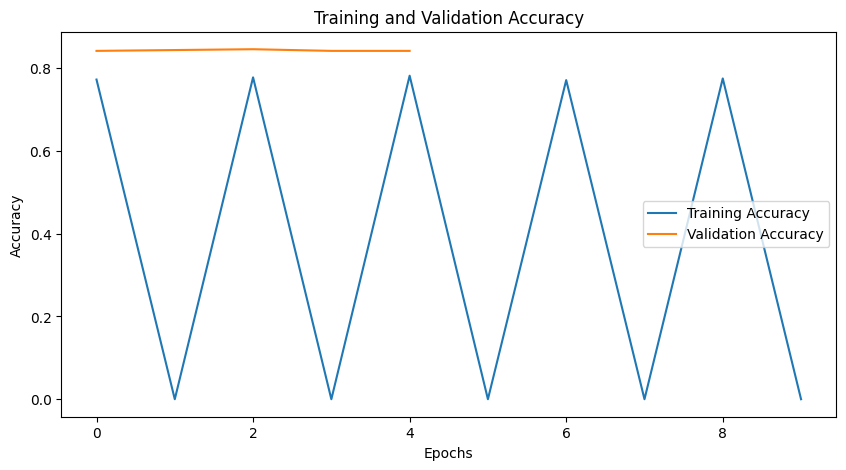

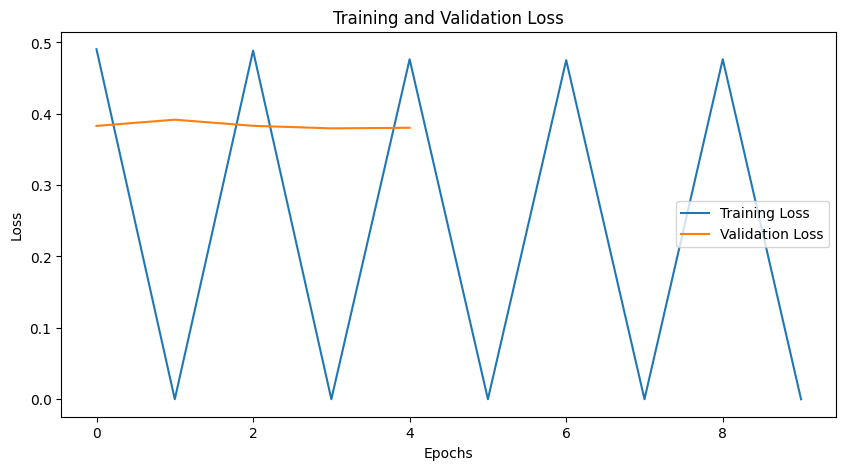

In [ ]:
plot_metrics(history_augmented_data2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model_augmented_data3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_augmented_data3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create dataset with proper initialization
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_data_augmented,
    output_signature=(
        tf.TensorSpec(shape=(224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )
).batch(32)

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_data,
    output_signature=(
        tf.TensorSpec(shape=(224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )
).batch(32)

# Train the model
history_augmented_data3 = model_augmented_data3.fit(
    train_data_augmented,
    epochs=10,
    validation_data=test_data,
    callbacks=[lr_callback]
)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 507ms/step - accuracy: 0.4890 - loss: 1.6089 - val_accuracy: 0.7740 - val_loss: 0.5483 - learning_rate: 0.0010
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 433ms/step - accuracy: 0.6832 - loss: 0.5982 - val_accuracy: 0.8220 - val_loss: 0.4863 - learning_rate: 0.0010
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - accuracy: 0.7143 - loss: 0.5597 - val_accuracy: 0.8480 - val_loss: 0.3476 - learning_rate: 0.0010
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 428ms/step - accuracy: 0.7599 - loss: 0.5185 - val_accuracy: 0.8580 - val_loss: 0.3645 - learning_rate: 0.0010
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 428ms/step - accuracy: 0.8095 - loss: 0.4381 - val_accuracy: 0.8420 - val_loss: 0.3792 - learning_rate: 5.0000e-04
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 427ms/step - accuracy: 0.8139 - loss: 0.4526 - val_accuracy: 0.8740 - val_loss: 0.3104 - learning_rate: 2.5000e-04
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 424ms/step - accuracy: 0.8304 - 

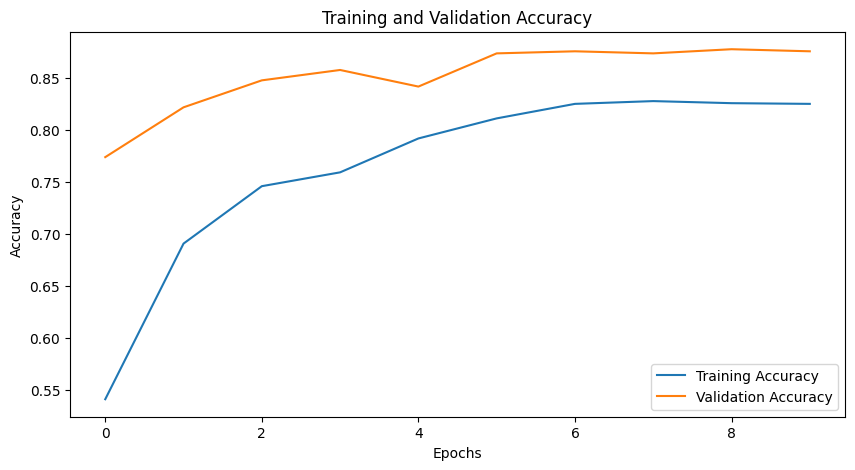

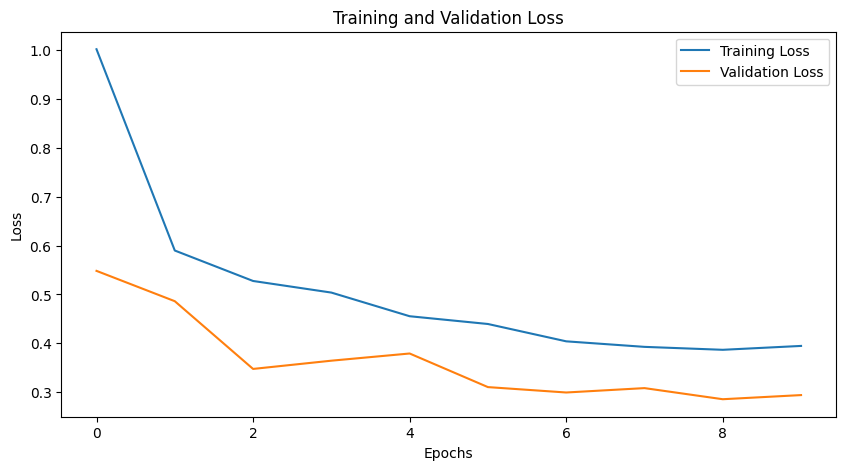

In [ ]:
plot_metrics(history_augmented_data3)

## Makinng a prediction on our own dataset

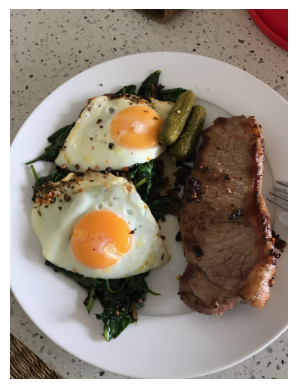

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from the given path
steak = mpimg.imread("/content/03-steak.jpeg")

# Display the image
plt.imshow(steak)
plt.axis('off')  # Hide axes for a cleaner image display
plt.show()


In [ ]:
print(f"Original shape: {steak.shape}")  # (4032, 3024, 3)

(4032, 3024, 3)

In [ ]:
 # Resize and preprocess
img_resized = tf.image.resize(steak, (224, 224))
img_normalized = img_resized / 255.0
img_batch = tf.expand_dims(img_normalized, 0)

print(f"Processed shape: {img_batch.shape}")  # (1, 224, 224, 3)

Processed shape: (1, 224, 224, 3)


In [ ]:
prediction = model_augmented_data3.predict(img_batch)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.93461406]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


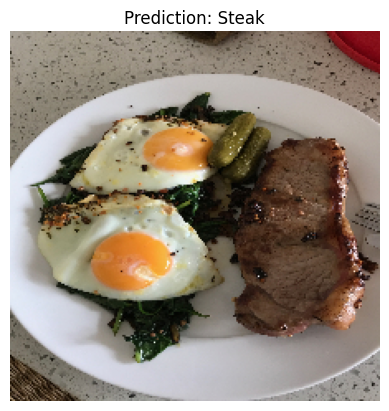

In [ ]:
def load_and_prep_image(filename):
    img = mpimg.imread(filename)
    img_resized = tf.image.resize(img, (224, 224))
    img_normalized = img_resized / 255.0
    return img_normalized

def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred)[0][0])]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()

# Example usage:
class_names = ["Pizza", "Steak"]
filename = "/content/03-steak.jpeg"
pred_and_plot(model_augmented_data3, filename, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


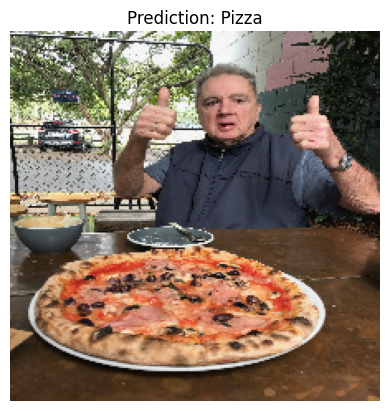

In [ ]:
filename = "/content/pizza.jpeg"
pred_and_plot(model_augmented_data3, filename, class_names)


In [ ]:
# Save the model in the new recommended format
model_augmented_data3.save('/content/pizza_steak_model.keras')

# Load the saved model (for future use)
loaded_model = tf.keras.models.load_model('/content/pizza_steak_model.keras')

# Verify that the model is loaded correctly
print("Model Loaded Successfully!")


Model Loaded Successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Save the model with the new name
model_augmented_data3.save('/content/pizza_steak_model.h5')

# Load the saved model (for future use)
loaded_model = tf.keras.models.load_model('/content/pizza_steak_model.h5')

# Verify that the model is loaded correctly
print("Model Loaded Successfully!")

Model Loaded Successfully!


In [ ]:
# Load the trained model (if it's not already loaded)
model = tf.keras.models.load_model('/content/pizza_steak_model.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('/content/pizza_steak_tinyml_1.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved as pizza_steak_tinyml_1.tflite")


Saved artifact at '/tmp/tmpt0w2t8kh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_23')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134619876909008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619876905936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619876902288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619876906512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619876904208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619876904592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134623493013136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134623492999696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134623493009104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134623492998928: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as

In [ ]:
def load_and_preprocess_image(filename):
    img = mpimg.imread(filename)
    img_resized = tf.image.resize(img, (224, 224))  # Resize to 224x224
    img_normalized = img_resized / 255.0  # Normalize the image
    return img_normalized

def predict_image(model_path, filename):
    # Load and preprocess the image
    img = load_and_preprocess_image(filename)

    # Load the TensorFlow Lite model using Interpreter
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output details for the model
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Set the input tensor
    input_tensor_index = input_details[0]['index']
    interpreter.set_tensor(input_tensor_index, np.expand_dims(img, axis=0).astype(np.float32))

    # Run inference
    interpreter.invoke()

    # Get the output tensor and make a prediction
    output_tensor_index = output_details[0]['index']
    pred = interpreter.get_tensor(output_tensor_index)

    # Class names
    class_names = ['pizza', 'steak']

    # Get the predicted class
    pred_class = class_names[int(np.round(pred[0][0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()

In [ ]:
model_path = '/content/pizza_steak_tinyml_1.tflite'  # Path to your TinyML model
filename = '/content/03-steak.jpeg'

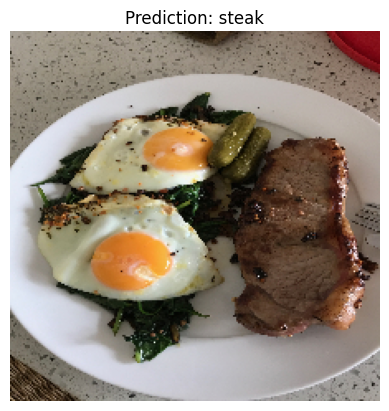

In [ ]:
predict_image(model_path, filename)


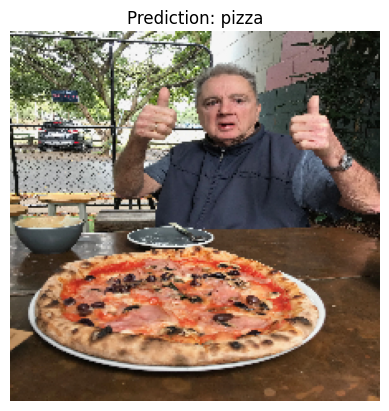

In [ ]:
model_path = '/content/pizza_steak_tinyml_1.tflite'  # Path to your TinyML model
filename = '/content/pizza.jpeg'
predict_image(model_path, filename)

In [ ]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('/content/pizza_steak_model.h5')

# Dummy representative dataset function (does not load actual data)
def representative_data_gen():
    # Dummy input to simulate a dataset
    dummy_input = tf.random.normal([1, 224, 224, 3])  # Input shape based on your model
    yield [dummy_input]

# Convert the model to TensorFlow Lite format (.tflite) with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.representative_dataset = representative_data_gen

# Convert the model to TensorFlow Lite format with quantization
tflite_model = converter.convert()

# Save the quantized TinyML model
with open('/content/pizza_steak_tinyml_model_quantized.tflite', 'wb') as f:
    f.write(tflite_model)

print("Quantized TensorFlow Lite model saved successfully!")


Saved artifact at '/tmp/tmpeex3ire7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_23')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134620028122512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134620028122320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134620028120976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619713888592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619713888976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619713887824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619713887440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619713886288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619713889168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134619713884368: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Quantized TensorFlow Lite model saved successfully!


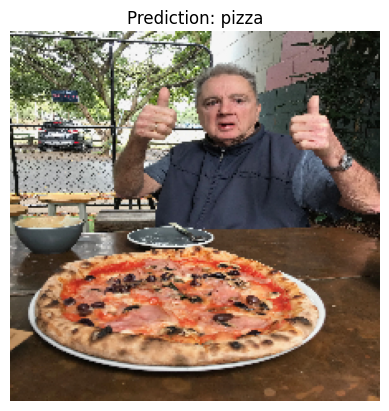

In [ ]:
model_path = '/content/pizza_steak_tinyml_model_quantized.tflite'  # Path to your TinyML model
filename = '/content/pizza.jpeg'
predict_image(model_path, filename)

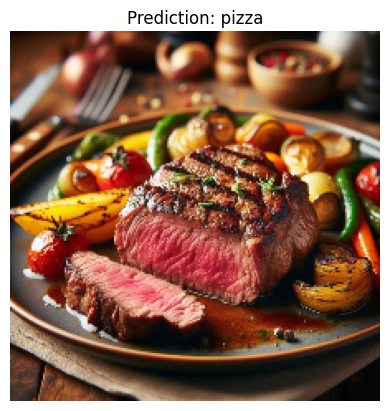

In [ ]:
model_path = '/content/pizza_steak_tinyml_model_quantized.tflite'  # Path to your TinyML model
filename = '/content/steak2.jpg'
predict_image(model_path, filename)

In [ ]:
model_path = '/content/pizza_steak_tinyml_1.tflite'  # Path to your TinyML model
filename = '/content/steak3.jpg'
predict_image(model_path, filename)